In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

chokurdakh ru
saleaula ws
kontagora ng
dubai ae
punta arenas cl
kaitangata nz
rikitea pf
beringovskiy ru
neiafu to
taseyevo ru
akyab mm
santa rosa ar
lagoa pt
vaini to
salina cruz mx
dikson ru
hithadhoo mv
rawson ar
ushuaia ar
san jose gt
ushuaia ar
wladyslawowo pl
hasaki jp
puerto ayora ec
mataura pf
carnarvon au
bengkulu id
jangaon in
marsh harbour bs
rikitea pf
ballitoville za
rikitea pf
cape town za
ribeira grande pt
rikitea pf
laguna br
shingu jp
ushuaia ar
ponta do sol cv
hithadhoo mv
punta arenas cl
adrar dz
laguna br
vila vu
kameshkovo ru
hilo us
avarua ck
rikitea pf
ushuaia ar
kapaa us
busselton au
jamestown sh
watsa cd
tuktoyaktuk ca
mataura pf
tasiilaq gl
bengkulu id
ushuaia ar
mataura pf
bandarbeyla so
punta arenas cl
cabedelo br
qabis tn
bredasdorp za
avarua ck
vaini to
mafeteng ls
butaritari ki
hermanus za
porto novo cv
ushuaia ar
campobasso it
sao felix do xingu br
hermanus za
qaqortoq gl
meulaboh id
lasa cn
nizhneyansk ru
vozrozhdeniye ru
bosilegrad rs
taolanaro mg
beng

hithadhoo mv
fershampenuaz ru
ushuaia ar
poum nc
mataura pf
mys shmidta ru
rikitea pf
inuvik ca
ancud cl
qaanaaq gl
saint-francois gp
xining cn
rikitea pf
mehamn no
horta pt
busselton au
lavrentiya ru
agua dulce mx
eyl so
tura ru
amderma ru
makakilo city us
acapulco mx
san cristobal ec
ushuaia ar
ouadda cf
tunduru tz
jamestown sh
rikitea pf
victoria sc
albany au
miracema do tocantins br
nizhneyansk ru
yellowknife ca
sisimiut gl
itororo br
bogale mm
jamestown sh
vaini to
rikitea pf
north bend us
punta arenas cl
evensk ru
new norfolk au
qaanaaq gl
nanortalik gl
kapaa us
saskylakh ru
anori br
busselton au
albany au
hilo us
the pas ca
tazovskiy ru
karratha au
rikitea pf
tumannyy ru
barrow us
bredasdorp za
bambous virieux mu
arrecife es
tiksi ru
yumen cn
punta arenas cl
new norfolk au
busselton au
provideniya ru
ushuaia ar
umzimvubu za
katsuura jp
arraial do cabo br
hobart au
dymer ua
mataura pf
hobart au
cape town za
sao filipe cv
port alfred za
tumpat my
cape town za
new norfolk au
rungat

hasaki jp
punta arenas cl
honningsvag no
rikitea pf
salalah om
butaritari ki
awbari ly
spremberg de
barentsburg sj
skibbereen ie
gilroy us
hermanus za
wausau us
boshnyakovo ru
praia cv
port alfred za
tuktoyaktuk ca
kaoma zm
hithadhoo mv
tautira pf
bengkulu id
codrington ag
inhambane mz
kavieng pg
ndele cf
bredasdorp za
rikitea pf
lingao cn
jacmel ht
massaguet td
rikitea pf
gangotri in
saint-philippe re
rikitea pf
bredasdorp za
esperance au
rikitea pf
iralaya hn
hermanus za
vaitupu wf
laguna br
sao filipe cv
bargal so
butaritari ki
kavieng pg
tautira pf
qaanaaq gl
suntar ru
alofi nu
khatanga ru
padang id
homer us
mar del plata ar
los llanos de aridane es
rikitea pf
new norfolk au
hilo us
haines junction ca
georgetown sh
hermanus za
hilo us
abu samrah qa
bambous virieux mu
nikolskoye ru
tura ru
nhulunbuy au
yellowknife ca
mataura pf
kaitangata nz
cidreira br
naantali fi
taolanaro mg
nanortalik gl
nevel ru
arraial do cabo br
cape town za
chichimila mx
punta arenas cl
barrow us
biskamzha r

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | saleaula
City not found. Skipping...
Processing Record 3 of Set 1 | kontagora
Processing Record 4 of Set 1 | dubai
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | beringovskiy
Processing Record 9 of Set 1 | neiafu
Processing Record 10 of Set 1 | taseyevo
Processing Record 11 of Set 1 | akyab
Processing Record 12 of Set 1 | santa rosa
Processing Record 13 of Set 1 | lagoa
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | salina cruz
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | rawson
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | san jose
Processing Record 21 of Set 1 | wladyslawowo
Processing Record 22 of Set 1 | hasaki
Processing Record 

Processing Record 37 of Set 4 | nikolskoye
Processing Record 38 of Set 4 | constitucion
Processing Record 39 of Set 4 | ramanuj ganj
Processing Record 40 of Set 4 | diamantina
Processing Record 41 of Set 4 | college
Processing Record 42 of Set 4 | chapais
Processing Record 43 of Set 4 | vao
Processing Record 44 of Set 4 | greeley
Processing Record 45 of Set 4 | roma
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | la ronge
Processing Record 48 of Set 4 | moussoro
Processing Record 49 of Set 4 | colquiri
Processing Record 50 of Set 4 | qiryat gat
Processing Record 1 of Set 5 | praya
Processing Record 2 of Set 5 | namibe
Processing Record 3 of Set 5 | mahebourg
Processing Record 4 of Set 5 | qax
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | torbay
Processing Record 7 of Set 5 | prado
Processing Record 8 of Set 5 | baturaja
Processing Record 9 of Set 5 | killybegs
Processing Record 10 of Set 5 | olinda
Proce

Processing Record 26 of Set 8 | suntar
Processing Record 27 of Set 8 | saint george
Processing Record 28 of Set 8 | bhakkar
Processing Record 29 of Set 8 | pisco
Processing Record 30 of Set 8 | riyadh
Processing Record 31 of Set 8 | scarborough
Processing Record 32 of Set 8 | siculeni
Processing Record 33 of Set 8 | fairbanks
Processing Record 34 of Set 8 | puerto escondido
Processing Record 35 of Set 8 | baruun-urt
Processing Record 36 of Set 8 | dharangaon
Processing Record 37 of Set 8 | angoram
Processing Record 38 of Set 8 | luena
Processing Record 39 of Set 8 | egvekinot
Processing Record 40 of Set 8 | mount isa
Processing Record 41 of Set 8 | khandyga
Processing Record 42 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 8 | kamaishi
Processing Record 44 of Set 8 | hokitika
Processing Record 45 of Set 8 | birao
Processing Record 46 of Set 8 | naranjito
Processing Record 47 of Set 8 | haines junction
Processing Record 48 of Set 8 | kapuskasing
Process

Processing Record 15 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 16 of Set 12 | kupang
Processing Record 17 of Set 12 | lekoni
Processing Record 18 of Set 12 | vysokogornyy
Processing Record 19 of Set 12 | stony plain
Processing Record 20 of Set 12 | wittmund
Processing Record 21 of Set 12 | djibo
Processing Record 22 of Set 12 | mae ramat
Processing Record 23 of Set 12 | karaton
Processing Record 24 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 25 of Set 12 | labuhan
Processing Record 26 of Set 12 | kajaani
Processing Record 27 of Set 12 | los llanos de aridane
Processing Record 28 of Set 12 | gongzhuling
Processing Record 29 of Set 12 | buraydah
Processing Record 30 of Set 12 | samarai
Processing Record 31 of Set 12 | honningsvag
Processing Record 32 of Set 12 | awbari
Processing Record 33 of Set 12 | spremberg
Processing Record 34 of Set 12 | skibbereen
Processing Record 35 of Set 12 | gilroy
Processing Record 36 of Set 12 | wausau
P

In [9]:
# Print the city count to confirm sufficient count.
len(cities)

607

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,6.40,91,85,6.85,RU,2020-10-23 19:23:21
1,Kontagora,10.40,5.47,77.07,44,98,1.59,NG,2020-10-23 19:23:22
2,Dubai,25.26,55.30,82.40,51,0,2.24,AE,2020-10-23 19:21:44
3,Punta Arenas,-53.15,-70.92,46.40,70,75,6.93,CL,2020-10-23 19:21:04
4,Kaitangata,-46.28,169.85,51.58,82,45,4.23,NZ,2020-10-23 19:23:23
5,Rikitea,-23.12,-134.97,74.12,77,41,6.51,PF,2020-10-23 19:23:23
6,Beringovskiy,63.05,179.32,33.44,92,100,21.88,RU,2020-10-23 19:19:42
7,Neiafu,-18.65,-173.98,77.00,78,20,8.05,TO,2020-10-23 19:23:24
8,Taseyevo,57.22,94.90,35.85,84,100,5.84,RU,2020-10-23 19:23:24
9,Akyab,20.15,92.90,81.21,84,100,19.80,MM,2020-10-23 19:23:25


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import the time module.
import time

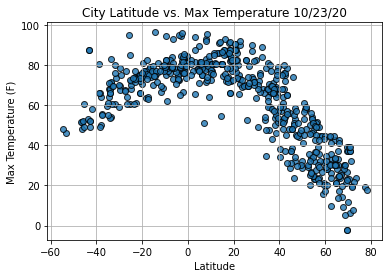

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

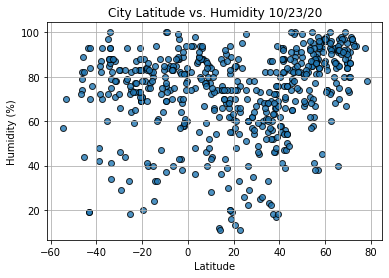

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

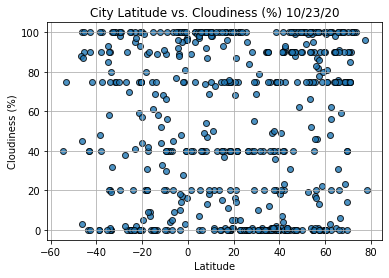

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

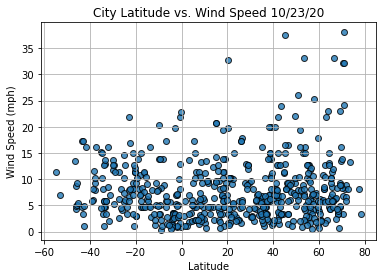

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()